In [13]:
## Packages 
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import re

In [14]:
cols = ['kategori','id','ny_dm_element','traeart','slaegtsnavn','planteaar','bydelsnavn','byrumstype','vejnavn','fritrumsprofil','stammeomfang','placering','omgivelse','reg_dato','opdateret_dato','wkb_geometry']
df = pd.read_csv('data/trae_basis.csv',sep=',',usecols=cols)

In [15]:
def get_x(row):
    x = re.findall(r"[-+]?\d*\.\d+|\d+", row)[0]
    return float(x)
def get_y(row):
    y = re.findall(r"[-+]?\d*\.\d+|\d+", row)[1]
    return float(y)

In [16]:
df['X'] = df['wkb_geometry'].apply(get_x)
df['Y'] = df['wkb_geometry'].apply(get_y)

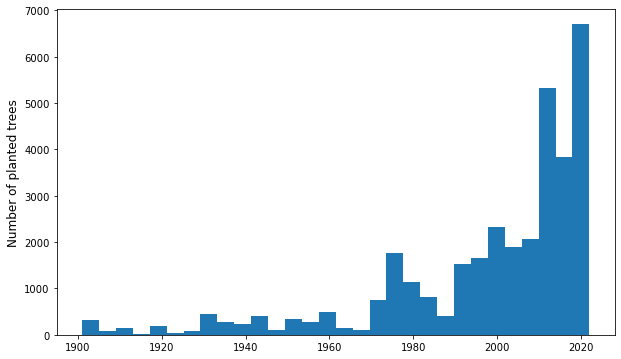

In [17]:
# Plot 1: antal plantede træer per år 
df1 = df[df["planteaar"] > 1900]
df1 = df1.dropna(subset=['planteaar'])
plt.figure(figsize=(10,6))
plt.hist(df1["planteaar"], bins = 30)
plt.ylabel('Number of planted trees',fontsize=12)
plt.show()

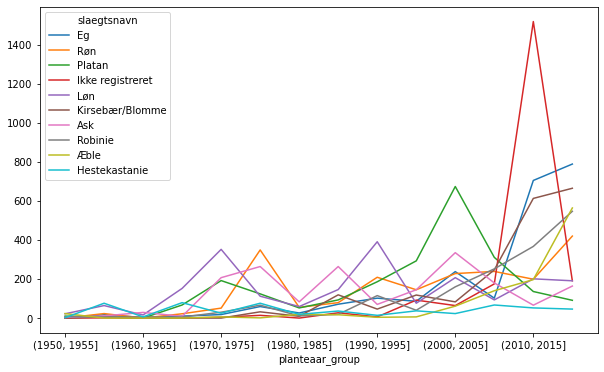

In [11]:
# Plot 2: trend plot 
tree_species = df["slaegtsnavn"].value_counts().sort_values(ascending = False)[1:11].index.to_list()
bins=[1950,1955,1960,1965,1970,1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
df['planteaar_group'] = pd.cut(df['planteaar'],bins=bins)
table = pd.pivot_table(df, values='id', index=["planteaar_group"],
                    columns=['slaegtsnavn'], aggfunc="count")
table = table[tree_species]
table.plot(figsize=(10, 6))
plt.show()

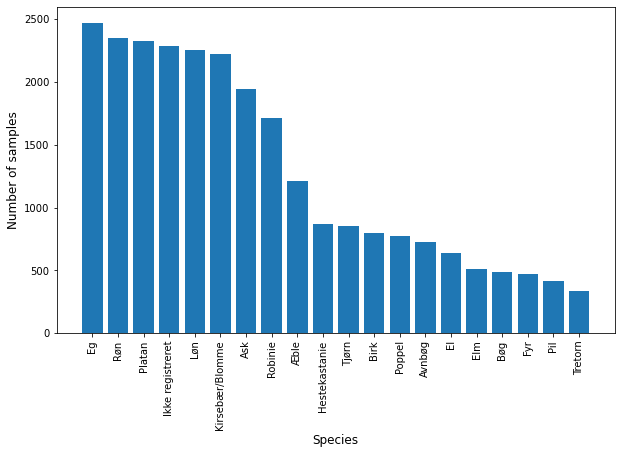

In [12]:
# Plot 3: variation i trearter 
df3 = df.groupby(['slaegtsnavn']).size().sort_values(ascending=False).reset_index(name='counts')
df3 = df3.iloc[1:21]
plt.figure(figsize = (10,6))
plt.bar(df3["slaegtsnavn"],df3['counts'])
plt.ylabel('Number of samples',fontsize=12)
plt.xlabel('Species', fontsize=12)
plt.xticks(rotation=90)
plt.show()

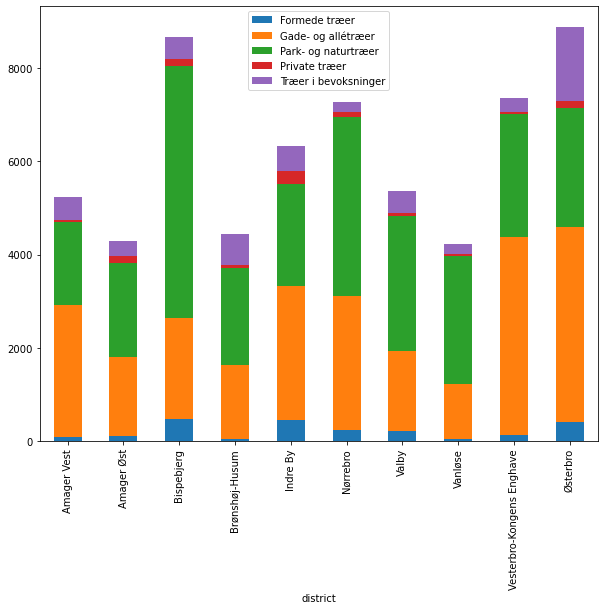

In [8]:
# Plot 4: 
df4 = df.groupby(['bydelsnavn','ny_dm_element']).size().reset_index()
df4.columns = ['district','category','count']
df4 = df4[df4['category']!='0'] #drop category '0' for Østerbro

count_category = df.groupby('ny_dm_element').size()
categories = count_category.index[count_category.index != '0'].to_list()
count_bydele = df[df['ny_dm_element'].isin(categories)].groupby(['bydelsnavn']).size().sort_values(ascending=False)

df4new = df4.pivot_table('count', ['district'], 'category')
df4new = df4new.reset_index()
df4new.plot(x='district',kind='bar',stacked=True,figsize=(10,8)).legend(loc='upper center')
plt.show()

In [16]:
# Plot 5: Heatmap 
data = df[df['ny_dm_element'] == 'Park- og naturtræer']

# List comprehension 
heat_data = [[row['Y'],row['X']] for index, row in data.iterrows()]

# Plot it on the map
lat = 55.6761
lon = 12.5683
map = folium.Map(location=[lat, lon],zoom_start = 12)
HeatMap(heat_data,radius=10,blur=10).add_to(map)

# Show map 
map